# Insurance Cost Prediction

**Research Question:**

Predicting the insurance cost of all the people based on various independent variabels available in the dataset from kaggle

Importing necessary libraries for our program

In [1]:
!pip install mlxtend

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

sns.set(rc={'figure.figsize':(8,5)})

In [3]:
dataframe = pd.read_csv('insurance_data.csv')
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Meta Data:**

Rows: 1338

Features - 06

Target Variable: (charges)


1. Age: Numeric columns with integer values
2. sex: Categorical column with value either 'male' or 'female'
3. bmi: Body mass index, ratio of height to weight (kg / m ^ 2)
4. children: No. of children
5. smoker: Categorical column for smoking preference either 'yes' or 'no'
6. region: Region with the country. [The data set taken from kaggle corresponds to the people from US]
7. charges: Medical charges billed by health insurance (in $)

In [4]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Here we can see, all the numeric columns [age, bmi, children, charges] with insights to their values.

1. (Update) All the numberic values have equal number of counts which signifies no NaN or NA values
   exists in the database. Just to make sure we will caculate them again below.
2. The maximum value in 'charges' is bit high as compared the 75% percentile. Which shows
   medical charges can differ from individual based on their medical conditions.

In [6]:
#Checking for NaN values
dataframe.isna().sum()

#Checking for Null values
# dataframe.isnull().sum().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Checking for duplicate values if any
dataframe.duplicated().any() #.sum() will gives the count

True

In [8]:
#There exist one or more duplicate values in the dataframe
dataframe.drop_duplicates(inplace=True)

In [9]:
dataframe['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='charges', ylabel='Count'>

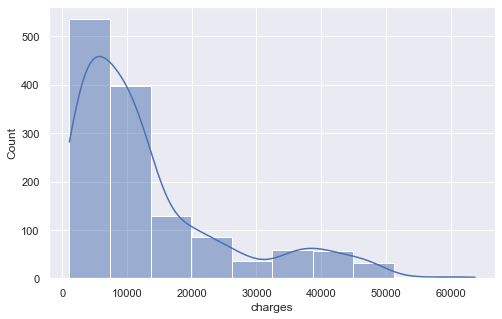

In [10]:
sns.histplot(dataframe['charges'],bins=10, stat='count', kde=True)

Using Boxplot to understand the data with comparisons to each values in each columns with Minimum, Maximum, Median Values along with the outliers.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

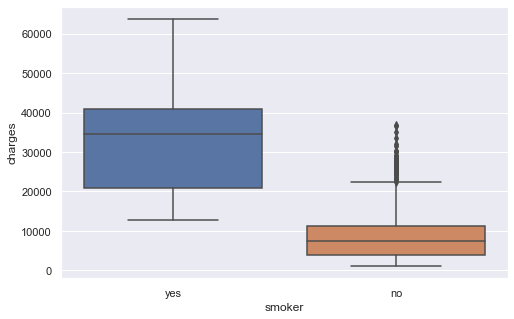

In [11]:
sns.boxplot(x='smoker', y='charges', data=dataframe)

<AxesSubplot:xlabel='region', ylabel='charges'>

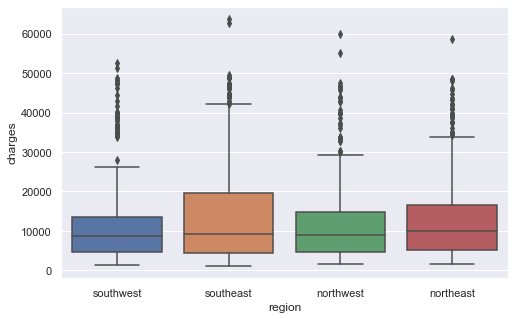

In [12]:
sns.boxplot(x='region', y='charges', data=dataframe)

<AxesSubplot:xlabel='sex', ylabel='charges'>

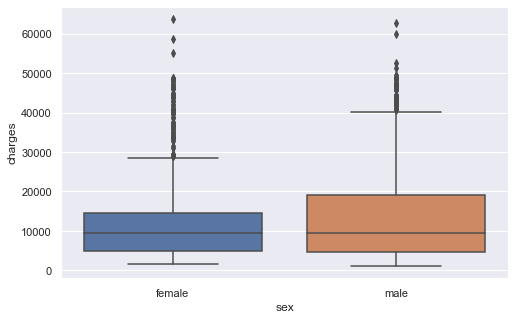

In [13]:
sns.boxplot(x='sex', y='charges',data=dataframe)

<AxesSubplot:xlabel='children', ylabel='charges'>

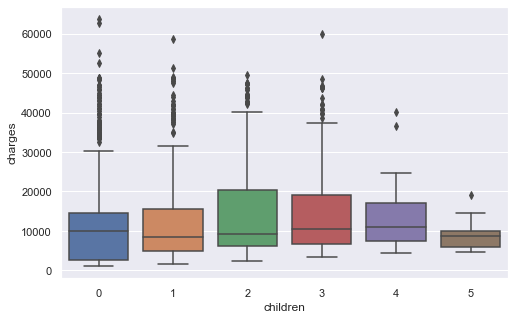

In [14]:
sns.boxplot(x='children', y='charges',data=dataframe)

Amoung the 6 Independent variables, **Children and Smoker** variables have a significant impact on the dependent variable i.e. Charges. The charges tends to increase with the number of children and if the smoking preference is yes.

Analysing the distribution of 'charges' with respect to 'smoker' variable

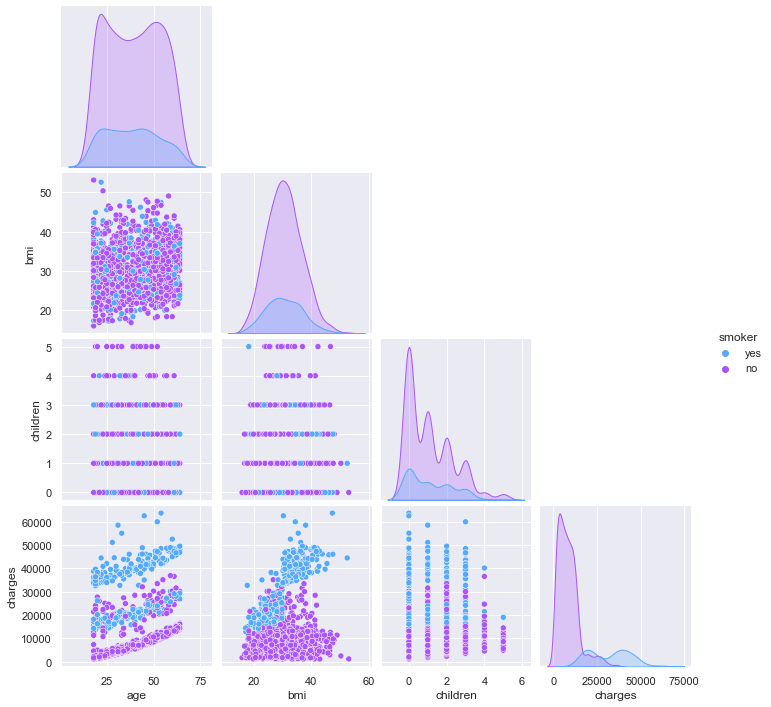

In [15]:
# Plotting 'smoker'
sns.pairplot(dataframe, hue='smoker', palette='cool', corner=True)
plt.show()

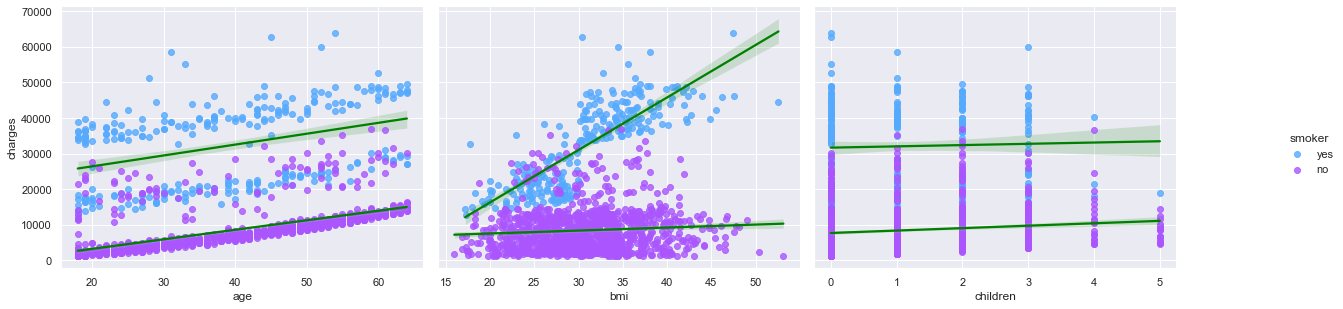

In [16]:
sns.pairplot(dataframe, x_vars= ['age', 'bmi', 'children'], y_vars=['charges'], hue='smoker', palette='cool',kind="reg",
             plot_kws={'line_kws':{'color':'green'}}
            ).fig.set_size_inches(20,5)

From the above graphs we can clearly see how Non-Smokers are generally billed less as compared to the Smoker population.

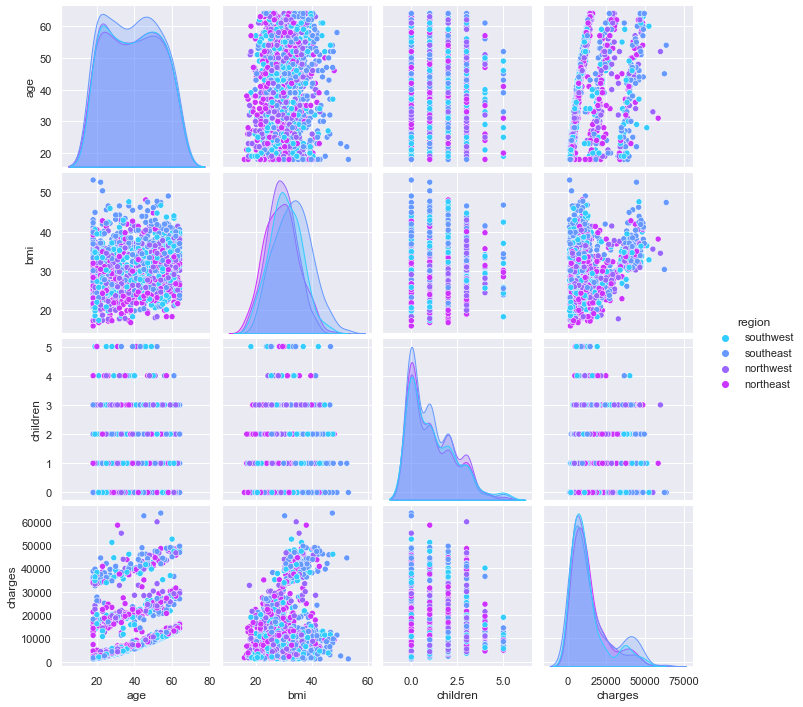

In [17]:
# Plotting 'region'
sns.pairplot(dataframe, hue='region', palette='cool') 
plt.show()

C:\Users\rangi\AppData\Local\Temp\ipykernel_9496\3772652229.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='BMI')


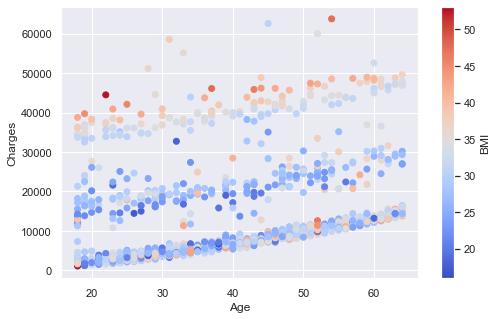

In [18]:
# plt.hist(dataframe[['charges']])
plt.scatter(dataframe[['age']], dataframe[['charges']], cmap='coolwarm', c=dataframe['bmi'])
plt.colorbar(label='BMI')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

It is pretty clear that with high BMI (Body Mass Index) the insurance cost is generally high for all the people irrespective of the ages, and with increase in age the insurance cost increases as well irrespective of any other condition.


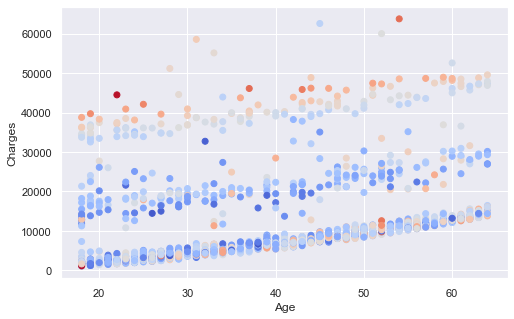

In [19]:
# plt.hist(dataframe[['charges']])
plt.scatter(dataframe[['age']], dataframe[['charges']], cmap='coolwarm', c=dataframe['bmi'])
# plt.colorbar(label='BMI')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [20]:
dataframe.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


From the above correlation matrix we can see there is no strong relation amoung the variables mentioned above


Single 'smoker' is a categorical variabel, we need to convert it to integral value to check for correlation between the independent variable i.e 'charges.

In [21]:
dataframe_dub = dataframe

In [22]:
# dataframe['smoker_value']=(dataframe['smoker']=='yes').astype(int)
# dataframe.corr()

Smoker have shown a 0.787 correlation value with charges variable which signifies a strong positive correlation between them.

# Creating the Model

Splitting the Data into Training and Testing Sets and making predictions.

In [23]:
dataframe.smoker = dataframe.smoker.map({'yes':1,'no':0}) ## smoker=1,non-smoker=0
dataframe.sex = dataframe.sex.map({'male':1,'female':0})  ## male=1,female=0
dataframe.region = dataframe.region.map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [24]:
dataframe_dub

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [25]:
#Need to convert catagorical values to numberic
dataframe = pd.get_dummies(dataframe)
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


In [42]:
"""
Adding all the columns of the dataframe to the X variable (Set of independent variable or explanatory variable) and
the response varuable will store the values in Y variable.
"""
x = dataframe.loc[ : , dataframe.columns != 'charges']
y = dataframe[['charges']]

x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = 0.3, random_state = None)
lm = LinearRegression()

Using the backward elemination method inorder to finialize the relevant columns to train the model

In [43]:
lm.fit(x_train, y_train)
pred = lm.predict(x_test)
# print(*pred)

# add a column of ones as integer data type
# Array of 1’s represents the constant assigned to first dimension of independent variable
x = np.append(arr = np.ones((1337, 1)).astype(int), 
              values = x, axis = 1)

x_opt = x[:, [0, 1, 2, 3, 4, 5, 6]]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.0
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:45:41   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.287e+04   1013.992    -12.696      0.000   -1.49e+04   -1.09e+04
x1           257.2032     11.899     21.616      0.000     233.861     280.546
x2          -129.4009    333.059     -0.389      0.698    -782.779     523.978
x3           332.5957     27.733     11.993      0.000     278.191     387.000
x4           478.7717    137.732      3.476      0.001     208.576     748.967
x5          2.382e+04    412.051     57.806      0.000     2.3e+04    2.46e+04
x6           354.0097    151.995      2.329      0.020      55.834     652.185
==============================================================================
Omnibus:                      298.466   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.712
Skew:                           1.206   Prob(JB):                    2.84e-155
Kurtosis:                       5.637   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, need to remove the **2nd and 6th** column since the P-Vlaue > 0.05 (5%)

   x2,	 -129.4009,	 333.059, -0.389, **0.698**, -782.779, 523.978
   
   x6,	  354.0097,	 151.995,  2.329, **0.020**,	 55.834,   652.185

In [44]:
# Removing 2nd column (sex) and 6th column (region)
rem_col = [0, 1, 3, 4, 5]
x_opt = x[:, rem_col]
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     996.5
Date:                Thu, 21 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:45:48   Log-Likelihood:                -13541.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1332   BIC:                         2.712e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    942.630    -12.835      0.000   -1.39e+04   -1.02e+04
x1           257.7728     11.910     21.644      0.000     234.409     281.137
x2           321.8708     27.388     11.752      0.000     268.143     375.599
x3           472.9751    137.879      3.430      0.001     202.492     743.458
x4          2.381e+04    411.414     57.875      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      300.944   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              719.880
Skew:                           1.215   Prob(JB):                    4.79e-157
Kurtosis:                       5.650   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
cols = [x-1 for x in rem_col[1:]]
[x for x in dataframe.columns[cols]]


['age', 'bmi', 'children', 'smoker']

Trying the Backward Elimination method using Mean Squared Error Estimate.

In [46]:
sfs1 = sfs(lm, k_features=4, forward=False, verbose=1, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
Features: 4/4

In [47]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['age', 'bmi', 'children', 'smoker']


From both the approach is it pretty clear that, **['age', 'bmi', 'children', 'smoker']** are the columns which have a significat impact on the **charges** (dependent) variable.

# Training and Testing the data based on the above mentioned Features

In [54]:
lm_all = LinearRegression()
lm_all.fit(x_train[x_train.columns[cols]], y_train[y_train.columns[-1]])
x_test_pred = lm_all.predict(x_test[x_train.columns[cols]])
x_train_pred = lm_all.predict(x_train[x_train.columns[cols]])
# x_test[x_train.columns[cols]]
x_test_pred

array([ 9.07292783e+03,  3.95124905e+04,  8.56012695e+03,  3.02465253e+03,
        1.00279432e+04,  7.86805359e+03,  7.88123795e+03,  1.53142606e+04,
        3.18888712e+04,  1.21085803e+04,  9.78478841e+03,  5.52321990e+03,
        9.72399316e+03,  1.62719375e+04,  5.74668572e+03,  3.78531738e+04,
        5.74158771e+03,  3.40263348e+04,  1.39230852e+04,  1.22278840e+04,
        2.07541354e+03,  1.70912243e+04,  8.76691955e+02,  1.51801408e+04,
        2.97531142e+04,  7.53926940e+03,  7.78450754e+03,  1.36275986e+04,
       -7.34787222e+02,  4.44453067e+03,  1.40003777e+04,  2.98801465e+03,
        4.26591289e+03,  2.93514816e+04,  1.51101284e+04,  3.71245591e+03,
        1.12268906e+04,  1.67509129e+04,  3.15698298e+04,  5.33091614e+03,
        1.46121695e+04,  2.64351060e+03,  8.50726946e+02,  1.34736890e+04,
        9.70139318e+03,  1.60818691e+04,  1.28134343e+04,  6.81050863e+03,
        3.22222769e+04,  3.81059708e+04,  4.87127439e+03,  2.60302628e+04,
        9.47697176e+03,  

In [49]:
y_test

,charges
74,7726.85400
94,47291.05500
100,6186.12700
684,4766.02200
927,12032.32600
...,...
1264,10370.91255
926,2913.56900
196,5649.71500
1158,2459.72010


Evaluating the Model

In [56]:
x_train.shape,x_test.shape

((935, 6), (402, 6))

In [57]:
r2_score(y_train,x_train_pred)

0.7681635569442393

Train Score: 74.09% of the dependent variable is predictable from the independent variable

In [58]:
r2_score(y_test,x_test_pred)

0.7051830959774446

Test Score: 76.28% of the dependent variable is predictable from the independent variable

In [59]:
print('Mean Squared Error:',mean_squared_error(y_train,x_train_pred))
print('Mean Absolute Error:',mean_absolute_error(y_train,x_train_pred))
print('Root Mean Squared Error: ',math.sqrt(mean_squared_error(y_test,x_test_pred)))

Mean Squared Error: 32944569.755300414
Mean Absolute Error: 3918.7929204225024
Root Mean Squared Error:  6760.916112975115


Adjusted R2 Score = 1- (1-R2) * (n-1) 

                 ---------------
                    (n-p-1)
                 
Where; 

n= Sample Size;  
p = Number of Independent Variables

R2 is an attempt to account the phenomenon of the R2 automatically increasing when extra explanatory variables are added to the model.


In [60]:
train_adj_r2 = 1 - (1-0.74)*(935-1) / (935-4-1)
train_adj_r2

0.7388817204301075

In [62]:
test_adj_r2 = 1 - (1-0.74)*(402-1) / (402-4-1)
test_adj_r2

0.7373803526448363

This model has 0.7373 adjusted R-squared values, which signifies that this model with its features explains **73%** of the total variation in charges.

We can take this to the next step with applying feature engineering and creating more features by the combination for the above features and use it in a polynomial model or any other model to check for better predictions and accuracy.